In [1]:
include("PVCR.jl");

# Residential cases

## Residential Case 1: Small PV System, this doesn't generate any injection into the grid

In [2]:
PVRes.capacity = 0.0
base_ebalance = annual_energy_balance(ice_residential, PVRes, print_output=false);
PVRes.capacity = 1.0
ts=simulate(ice_residential, PVRes, 3);

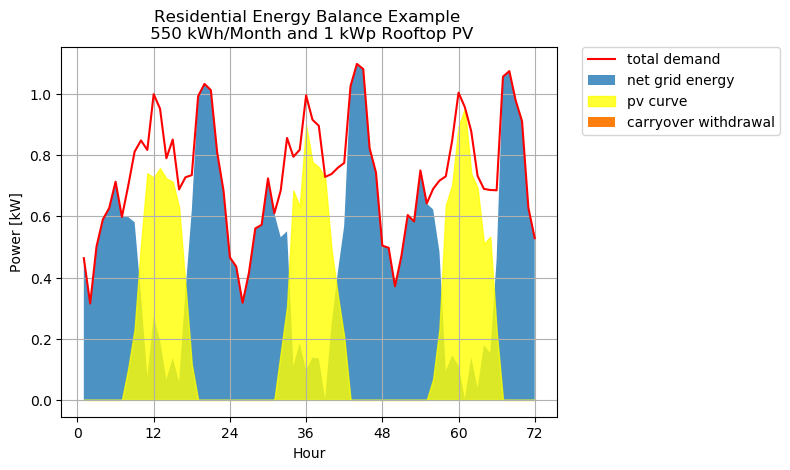

In [3]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "net grid energy", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "pv curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "carryover withdrawal")
plot(hours, ts["demand_curve"], label = "total demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);
title("Residential Energy Balance Example \n 550 kWh/Month and 1 kWp Rooftop PV");

### Energy Balance for case residential 1

In [4]:
ebalance = annual_energy_balance(ice_residential, PVRes, print_output=true);

month consumer_energy PV_energy injection_grid grid_energy global_allowance allowance withdrawn_energy utility_supplied_energy carryover peak_power peak_demand
1 545.84 204.15 1.75 343.44 100.03 1.75 1.75 341.69 0.0 1.19 1.19
2 545.41 138.38 0.0 407.03 166.09 0.0 0.0 407.03 0.0 1.31 1.31
3 553.57 144.07 0.01 409.51 236.68 0.01 0.01 409.5 0.0 1.19 1.19
4 540.57 167.89 0.07 372.75 318.95 0.07 0.07 372.68 0.0 1.21 1.21
5 553.89 185.9 0.94 368.94 409.96 0.94 0.94 367.99 0.0 1.21 1.21
6 555.82 168.85 0.14 387.11 491.75 0.14 0.14 386.97 0.0 1.24 1.24
7 538.6 171.36 0.0 367.24 575.58 0.0 0.0 367.24 0.0 1.16 1.16
8 547.16 168.31 1.59 380.44 658.05 1.59 1.59 378.85 0.0 1.19 1.19
9 536.94 178.77 0.81 358.98 744.06 0.81 0.81 358.17 0.0 1.19 1.19
10 559.76 184.74 0.08 375.1 833.77 0.08 0.08 375.03 0.0 1.21 1.21
11 557.76 145.73 0.0 412.03 905.1 0.0 0.0 412.03 0.0 1.24 1.24
12 558.25 186.2 0.43 372.48 996.34 0.43 0.43 372.05 0.0 1.21 1.21


### Billings case residential 1

In [5]:
bills_residential = Dict();  base_bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "demand_charge", " ", "total_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], ice_residential, print_output=true)
    base_bills_residential[m] = monthly_bill(base_ebalance[m], ice_residential, print_output=false)
end

grid_cost withdrawn_energy_cost demand_charge total_cost | counterfactual_cost savings
163750.94 36.75 0.0 189491.86  | 224025.8 34533.95
173140.85 0.0 0.0 200510.77  | 223953.31 23442.54
173495.84 0.12 0.0 200929.39  | 225335.6 24406.21
168204.04 1.55 0.0 194693.3  | 223133.04 28439.74
167530.29 19.86 0.0 193924.01  | 225389.58 31465.56
170257.63 3.03 0.0 197116.12  | 225716.3 28600.18
167421.77 0.0 0.0 193769.04  | 222798.77 29029.73
169090.31 33.45 0.0 195781.49  | 224249.58 28468.09
166119.48 17.02 0.0 192257.06  | 222518.21 30261.15
168541.14 1.59 0.0 195090.73  | 226384.7 31293.97
173859.56 0.0 0.0 201357.99  | 226045.06 24687.07
168113.32 8.98 0.0 194596.48  | 226128.51 31532.03


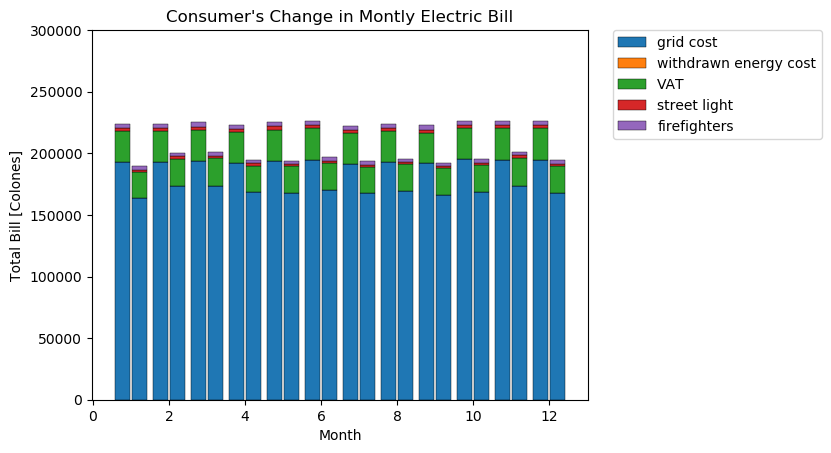

In [6]:
plot_bill(base_bills_residential, bills_residential, ["grid_cost", "withdrawn_energy_cost", "VAT", "street_light", "firefighters"]);

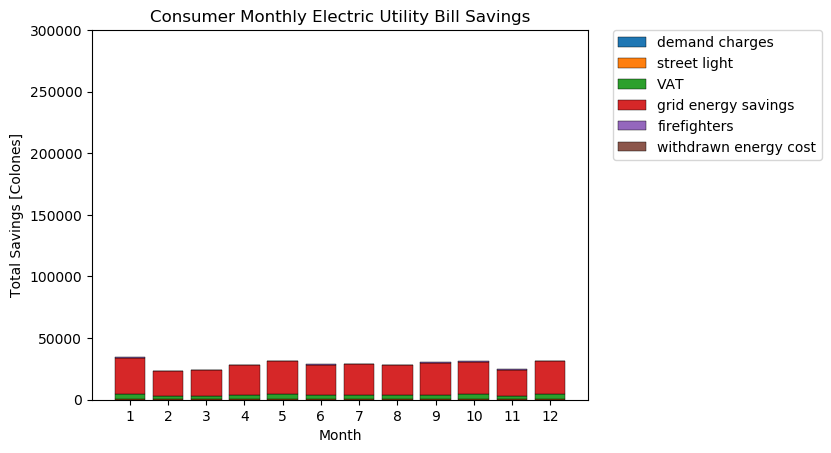

In [7]:
plot_savings(bills_residential);

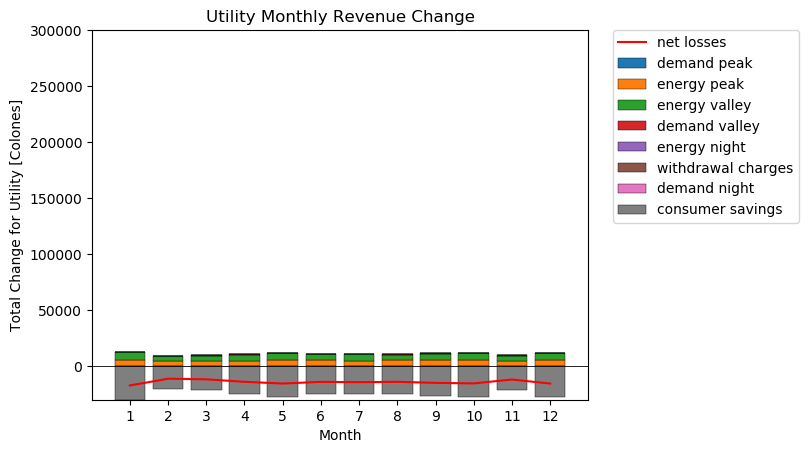

In [8]:
plot_utility_change(bills_residential);

## Residential Case 2: Medium Size PV System, produces some injection into the grid 

In [9]:
PVRes.capacity = 2.0
ts=simulate(ice_residential, PVRes, 3);

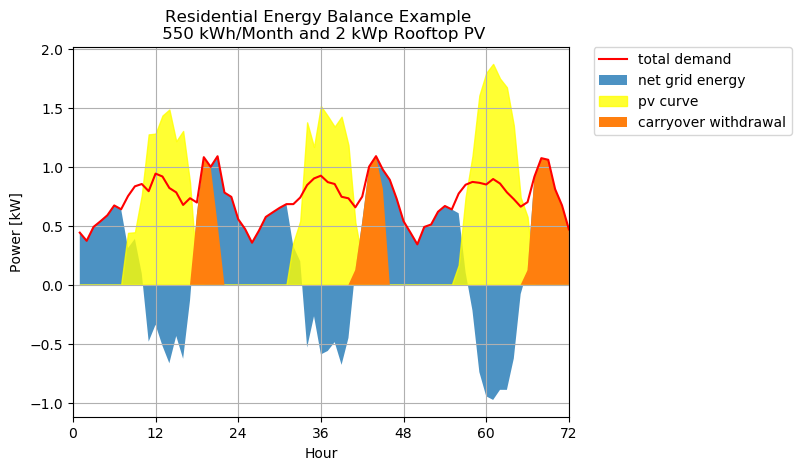

In [10]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "net grid energy", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "pv curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "carryover withdrawal")
plot(hours, ts["demand_curve"], label = "total demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
xlim(1,72)
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);
title("Residential Energy Balance Example \n 550 kWh/Month and 2 kWp Rooftop PV");

### Energy Balance for case residential 2

In [11]:
ebalance = annual_energy_balance(ice_residential, PVRes, print_output=true);

month consumer_energy PV_energy injection_grid grid_energy global_allowance allowance withdrawn_energy utility_supplied_energy carryover peak_power peak_demand
1 545.69 356.85 114.01 302.86 174.85 114.01 114.01 188.85 0.0 1.18 1.18
2 547.61 255.87 45.29 337.03 186.22 45.29 45.29 291.74 0.0 1.29 1.29
3 552.5 281.15 68.95 340.3 278.69 68.95 68.95 271.35 0.0 1.19 1.19
4 539.52 317.22 92.79 315.09 365.17 92.79 92.79 222.3 0.0 1.19 1.19
5 553.31 354.4 100.24 299.15 446.04 100.24 100.24 198.91 0.0 1.2 1.2
6 555.09 332.57 92.73 315.25 508.76 92.73 92.73 222.51 0.0 1.21 1.21
7 537.38 334.23 100.79 303.93 579.8 100.79 100.79 203.15 0.0 1.17 1.17
8 546.17 346.13 114.19 314.23 648.62 114.19 114.19 200.04 0.0 1.19 1.19
9 536.84 327.3 106.33 315.87 694.8 106.33 106.33 209.54 0.0 1.21 1.21
10 558.15 338.96 95.07 314.25 754.56 95.07 95.07 219.18 0.0 1.21 1.21
11 558.41 346.62 98.93 310.72 829.34 98.93 98.93 211.79 0.0 1.25 1.25
12 559.55 331.24 95.23 323.54 892.72 95.23 95.23 228.31 0.0 1.21 1.21


### Billings case residential 2

In [12]:
bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "demand_charge", " ", "total_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], ice_residential, print_output=true)
end

grid_cost withdrawn_energy_cost demand_charge total_cost | counterfactual_cost savings
139373.45 2397.72 0.0 164045.3  | 224001.25 59955.95
156571.85 952.49 0.0 182275.82  | 224325.31 42049.49
153642.34 1450.03 0.0 179499.86  | 225154.17 45654.31
146593.54 1951.38 0.0 171873.22  | 222955.41 51082.19
140176.01 2108.02 0.0 164617.11  | 225291.69 60674.58
146623.92 1950.14 0.0 171907.34  | 225592.11 53684.77
143840.48 2119.57 0.0 168856.87  | 222592.82 53735.95
143532.0 2401.48 0.0 168872.73  | 224082.17 55209.44
144759.25 2236.1 0.0 170098.58  | 222500.71 52402.14
146145.03 1999.24 0.0 171409.66  | 226110.59 54700.93
145082.44 2080.58 0.0 170267.82  | 226155.8 55887.98
147456.77 2002.62 0.0 172960.57  | 226347.99 53387.42


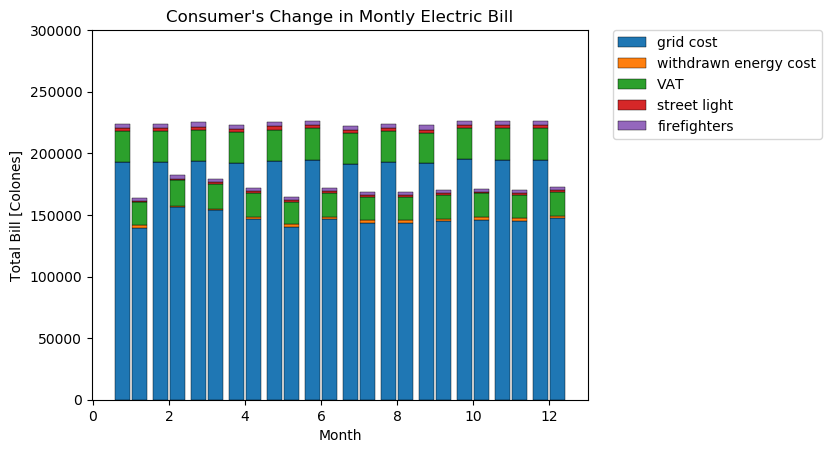

In [13]:
plot_bill(base_bills_residential, bills_residential, ["grid_cost", "withdrawn_energy_cost", "VAT", "street_light", "firefighters"]);

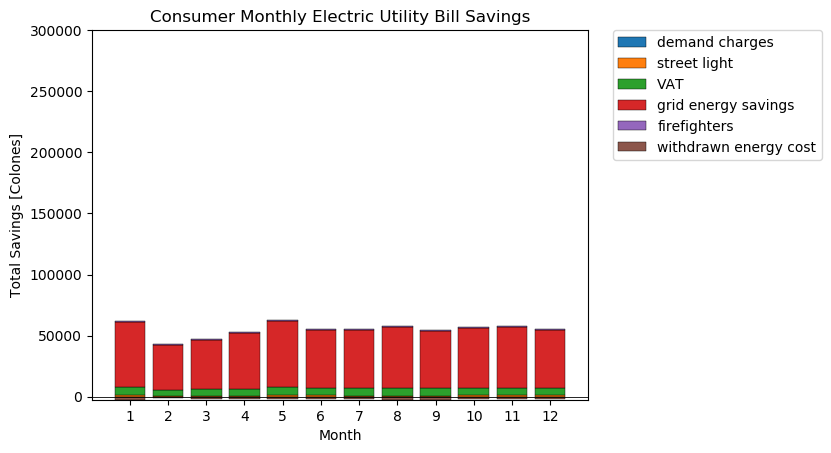

In [14]:
plot_savings(bills_residential);

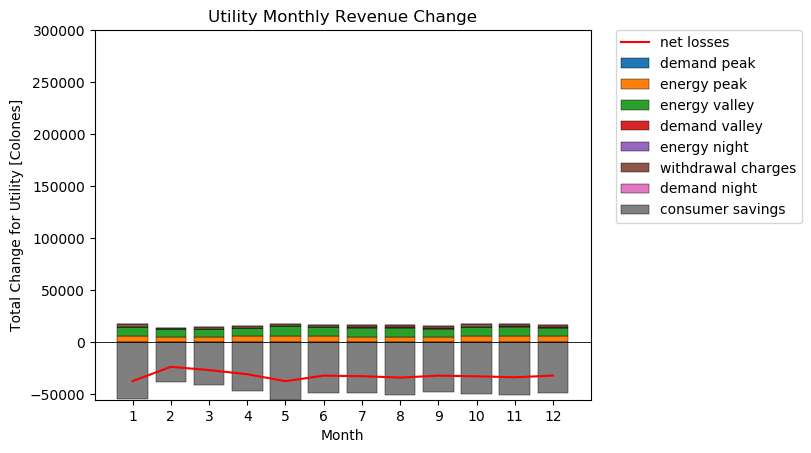

In [15]:
plot_utility_change(bills_residential);

## Residential Case 3: Large PV System that generates multi-day carry over

In [16]:
PVRes.capacity = 4.0
ts=simulate(ice_residential, PVRes, 3);

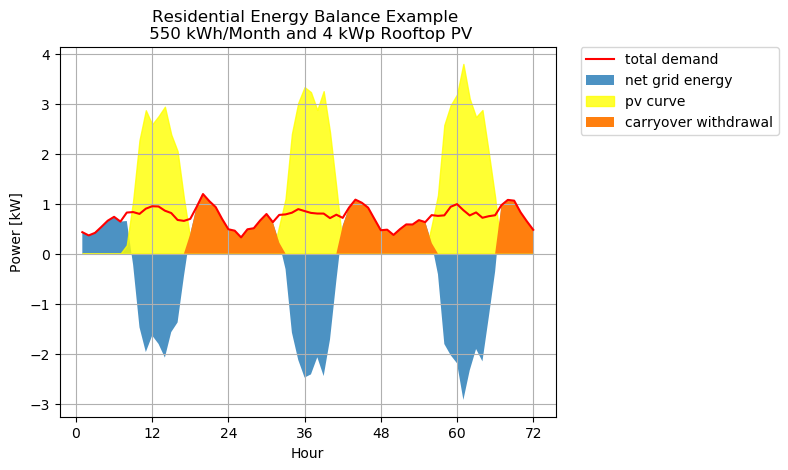

In [17]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "net grid energy", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "pv curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "carryover withdrawal")
plot(hours, ts["demand_curve"], label = "total demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);
title("Residential Energy Balance Example \n 550 kWh/Month and 4 kWp Rooftop PV");

### Energy Balance for case residential 3

In [18]:
ebalance = annual_energy_balance(ice_residential, PVRes, print_output=true);

month consumer_energy PV_energy injection_grid grid_energy global_allowance allowance withdrawn_energy utility_supplied_energy carryover peak_power peak_demand
1 546.58 804.02 536.59 279.15 393.97 393.97 279.15 0.0 114.82 1.18 1.18
2 545.92 509.5 275.45 311.87 364.47 364.47 311.87 0.0 52.6 1.3 1.3
3 554.93 624.09 384.57 315.42 358.41 358.41 315.42 0.0 42.99 1.2 1.2
4 540.77 716.56 455.11 279.32 394.11 394.11 279.32 0.0 114.79 1.21 1.21
5 554.77 700.57 430.22 284.42 458.07 458.07 284.42 0.0 173.65 1.21 1.21
6 559.05 695.4 432.49 296.14 514.39 514.39 296.14 0.0 218.25 1.23 1.23
7 539.19 714.71 451.47 275.96 568.46 568.46 275.96 0.0 292.5 1.16 1.16
8 547.52 731.97 486.83 302.38 651.16 651.16 302.38 0.0 348.78 1.19 1.19
9 539.49 689.73 426.14 275.9 686.75 686.75 275.9 0.0 410.85 1.2 1.2
10 557.92 720.13 480.93 318.71 763.72 763.72 318.71 0.0 445.01 1.21 1.21
11 558.46 717.34 455.65 296.76 796.51 796.51 296.76 0.0 499.75 1.25 1.25
12 559.94 745.25 484.74 299.43 864.92 864.92 299.43 0.0 565.

### Billings case residential 3

In [19]:
bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "demand_charge", " ", "total_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], ice_residential, print_output=true)
end

grid_cost withdrawn_energy_cost demand_charge total_cost | counterfactual_cost savings
3189.6 5870.51 0.0 7229.42  | 224150.52 216921.11
3189.6 6558.62 0.0 8929.43  | 224039.55 215110.12
3189.6 6633.18 0.0 9030.95  | 225565.62 216534.68
3189.6 5874.12 0.0 7233.87  | 223167.11 215933.24
3189.6 5981.32 0.0 8143.44  | 225538.49 217395.04
3189.6 6227.86 0.0 8479.11  | 226263.88 217784.78
3189.6 5803.36 0.0 7146.72  | 222899.93 215753.21
3189.6 6359.07 0.0 8657.75  | 224310.71 215652.96
3189.6 5802.16 0.0 7145.25  | 222950.45 215805.21
3189.6 6702.5 0.0 9125.31  | 226071.58 216946.26
3189.6 6240.77 0.0 8496.68  | 226162.95 217666.26
3189.6 6297.02 0.0 8573.27  | 226414.67 217841.4


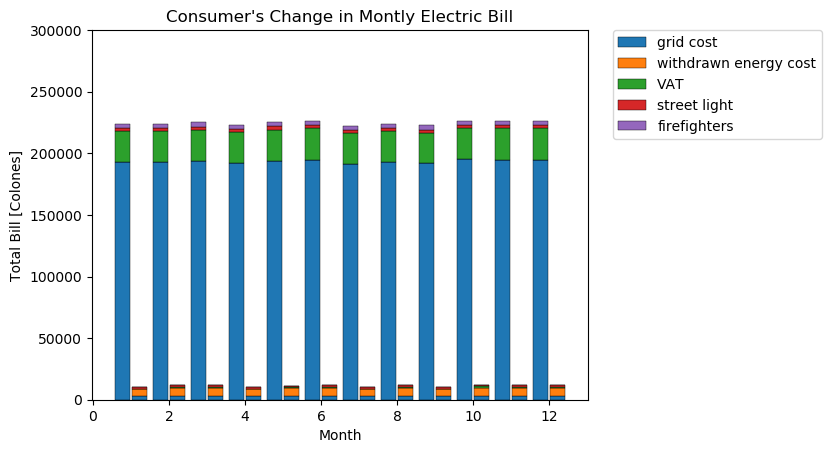

In [20]:
plot_bill(base_bills_residential, bills_residential, ["grid_cost", "withdrawn_energy_cost", "VAT", "street_light", "firefighters"]);

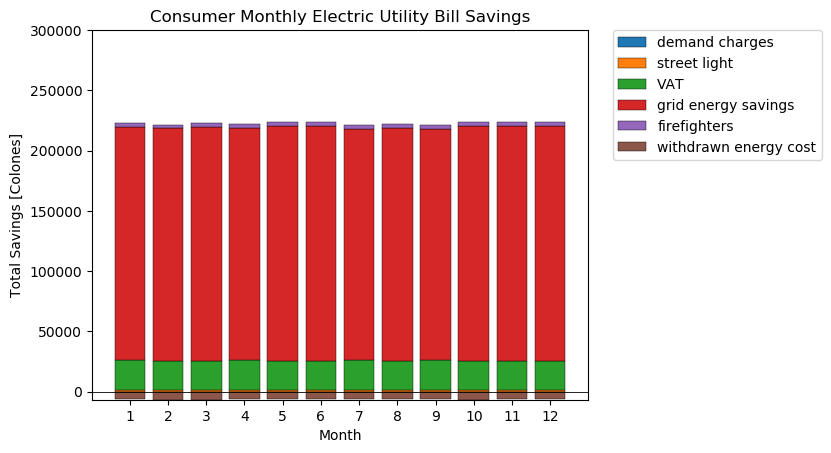

In [21]:
plot_savings(bills_residential);

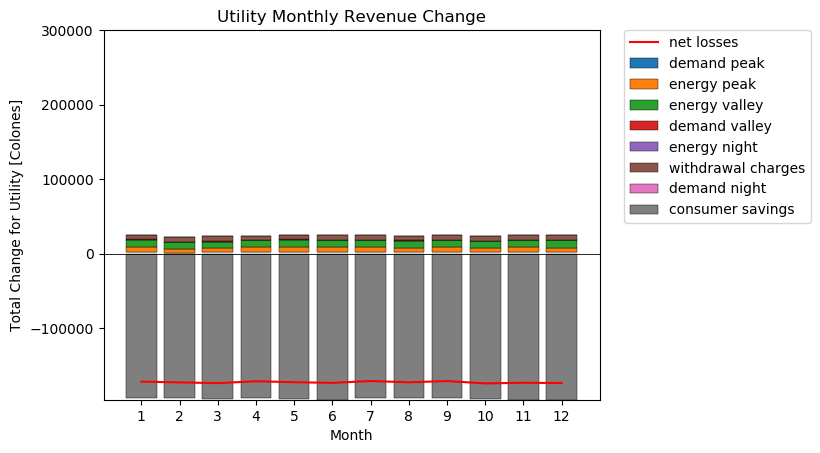

In [22]:
plot_utility_change(bills_residential);

# Commercial consumer subject to commercial and small size industrial tariff cases

## Commercial case1: small PV system

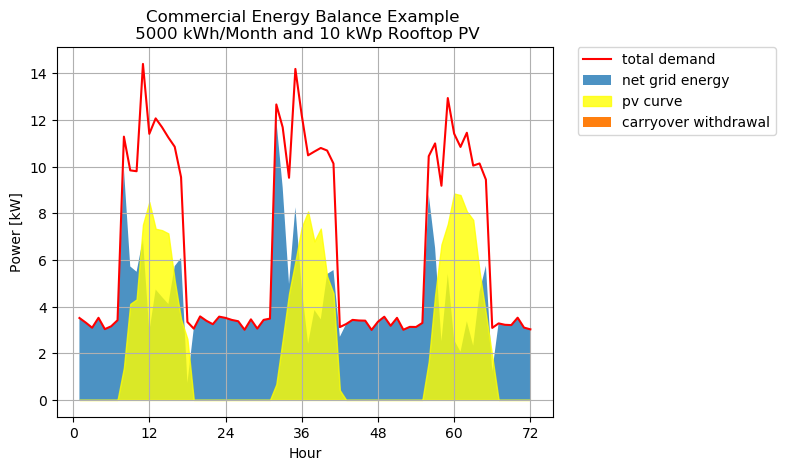

PyObject Text(0.5, 1.0, 'Commercial Energy Balance Example \n 5000 kWh/Month and 10 kWp Rooftop PV')

In [23]:
PVComInd.capacity = 0.0
base_ebalance = annual_energy_balance(ice_commercial, PVComInd, print_output=false);
PVComInd.capacity = 10.0
ts=simulate(ice_commercial, PVComInd, 3);
fill_between(hours, ts["injection_grid_h"], label = "net grid energy", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "pv curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "carryover withdrawal")
plot(hours, ts["demand_curve"], label = "total demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);
title("Commercial Energy Balance Example \n 5000 kWh/Month and 10 kWp Rooftop PV")

In [24]:
ebalance = annual_energy_balance(ice_commercial, PVComInd, print_output=true);

month consumer_energy PV_energy injection_grid grid_energy global_allowance allowance withdrawn_energy utility_supplied_energy carryover peak_power peak_demand
1 5014.26 1770.01 0.0 3244.25 867.3 0.0 0.0 3244.25 0.0 14.9 10.51
2 5098.06 1357.43 0.0 3740.63 1532.44 0.0 0.0 3740.63 0.0 16.87 12.57
3 4846.76 1488.12 0.0 3358.64 2261.62 0.0 0.0 3358.64 0.0 14.5 10.83
4 5037.05 1677.15 0.0 3359.9 3083.42 0.0 0.0 3359.9 0.0 15.41 10.38
5 5339.44 1709.82 0.0 3629.62 3921.24 0.0 0.0 3629.62 0.0 15.94 11.61
6 5200.94 1617.06 0.0 3583.88 4713.6 0.0 0.0 3583.88 0.0 16.01 11.45
7 4966.31 1700.05 0.0 3266.27 5546.62 0.0 0.0 3266.27 0.0 14.81 9.87
8 4997.69 1843.16 0.0 3154.52 6449.77 0.0 0.0 3154.52 0.0 14.55 9.51
9 4905.56 1676.71 0.0 3228.85 7271.36 0.0 0.0 3228.85 0.0 15.03 10.59
10 4734.95 1638.64 0.0 3096.31 8074.29 0.0 0.0 3096.31 0.0 14.11 9.3
11 4919.09 1668.34 0.0 3250.75 8891.78 0.0 0.0 3250.75 0.0 14.94 10.19
12 4860.43 1847.71 0.05 3012.77 9797.15 0.05 0.05 3012.72 0.0 14.39 9.07


In [25]:
bills_commercial = Dict()
base_bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " ", "total_demand_charges", " | ", 
        "counterfactual_energy_cost", " ", "counterfactual_demand_cost", " ", "counterfactual_cost", " ", " | ", "savings")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], ice_commercial, print_output=true)
    base_bills_commercial[m] = monthly_bill(base_ebalance[m], ice_commercial, print_output=false)
end

grid_cost withdrawn_energy_cost total_energy_cost total_demand_charges | counterfactual_energy_cost counterfactual_demand_cost counterfactual_cost  | savings
233131.93 0.0 11878.17 295748.22  | 360324.86 11878.17 449667.15  | 153918.93
268801.75 0.0 11878.17 338913.05  | 366346.38 11878.17 456953.92  | 118040.87
241351.69 0.0 11878.17 305695.13  | 348287.9 11878.17 435100.97  | 129405.84
241442.66 0.0 11878.17 305805.22  | 361962.42 11878.17 451648.8  | 145843.58
260824.51 0.0 11878.17 329259.61  | 383692.25 11878.17 477944.54  | 148684.93
257537.59 0.0 11878.17 325282.04  | 373739.84 11878.17 465900.91  | 140618.87
234713.85 0.0 11878.17 297662.54  | 356879.25 11878.17 445497.55  | 147835.0
226684.01 0.0 11878.17 287945.45  | 359133.64 11878.17 448225.64  | 160280.19
232025.05 0.0 11878.17 294408.76  | 352513.26 11878.17 440214.17  | 145805.41
222500.78 0.0 11878.17 282883.24  | 340253.43 11878.17 425378.28  | 142495.04
233599.14 0.0 11878.17 296313.6  | 353485.89 11878.17 441391.17  

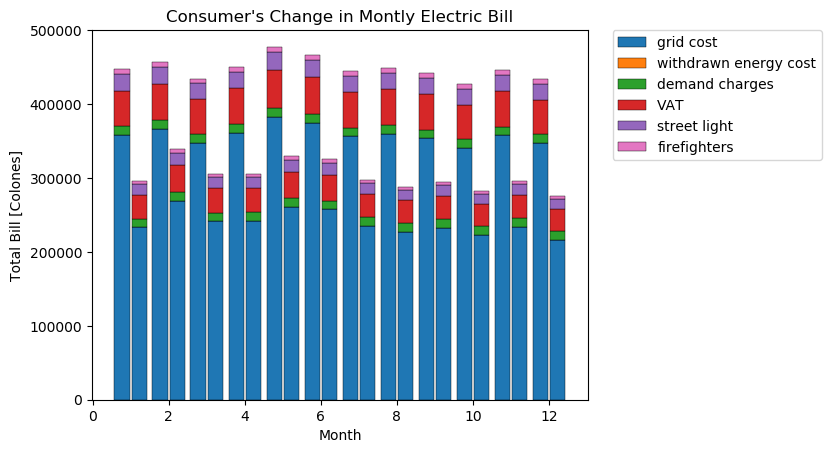

In [26]:
plot_bill(base_bills_commercial, bills_commercial, ["grid_cost", "withdrawn_energy_cost", "demand_charges", "VAT", "street_light", "firefighters"]);

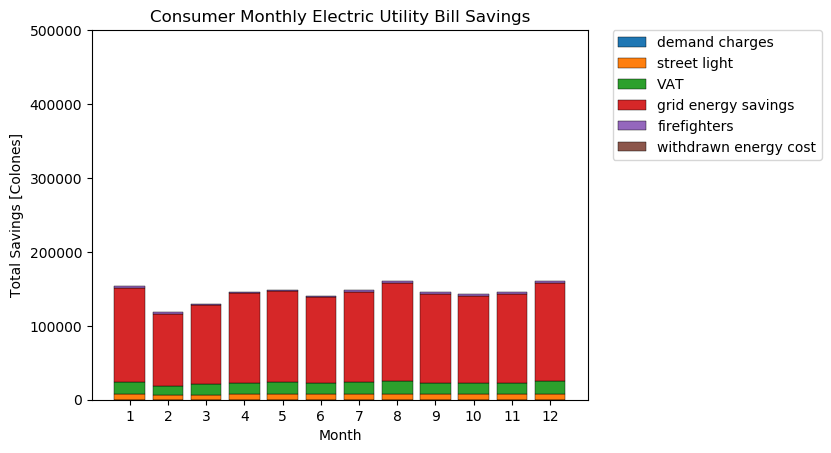

In [27]:
plot_savings(bills_commercial);

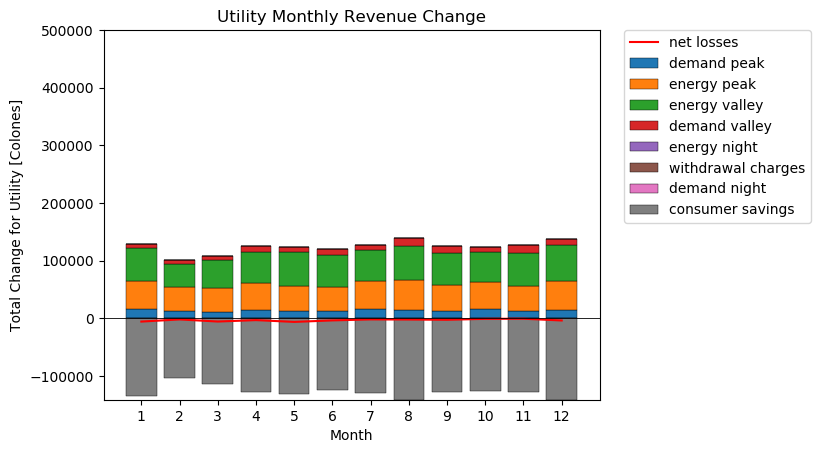

In [28]:
plot_utility_change(bills_commercial);

## Commercial case 2: medium PV system

In [29]:
PVComInd.capacity = 21.0
ts=simulate(ice_commercial, PVComInd, 3);

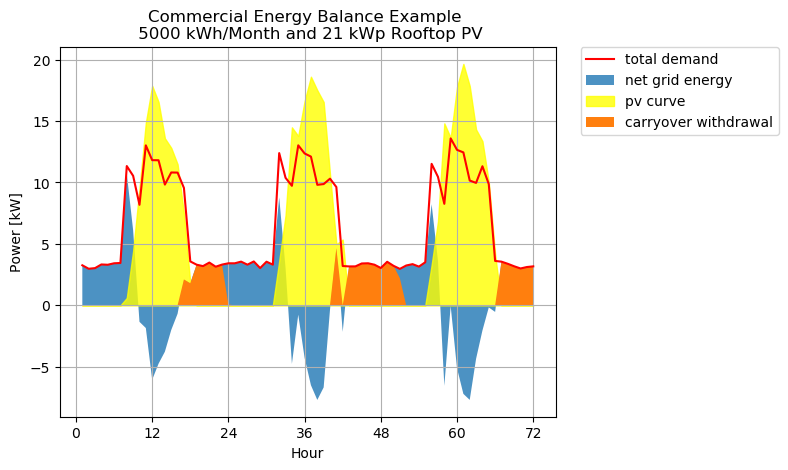

In [30]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "net grid energy", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "pv curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "carryover withdrawal")
plot(hours, ts["demand_curve"], label = "total demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);
title("Commercial Energy Balance Example \n 5000 kWh/Month and 21 kWp Rooftop PV");

In [31]:
ebalance = annual_energy_balance(ice_commercial, PVComInd, print_output=true);

month consumer_energy PV_energy injection_grid grid_energy global_allowance allowance withdrawn_energy utility_supplied_energy carryover peak_power peak_demand
1 4969.4 4042.05 829.34 1756.69 1980.6 829.34 829.34 927.36 0.0 14.71 8.35
2 5115.66 2716.0 174.0 2573.66 2482.11 174.0 174.0 2399.66 0.0 16.85 12.48
3 4857.78 2949.08 273.77 2182.46 3753.15 273.77 273.77 1908.69 0.0 14.32 10.85
4 5002.92 3321.1 374.78 2056.6 5106.73 374.78 374.78 1681.82 0.0 15.33 7.43
5 5389.4 3759.52 560.64 2190.53 6574.11 560.64 560.64 1629.89 0.0 15.94 8.76
6 5190.58 3622.63 439.07 2007.03 7788.55 439.07 439.07 1567.96 0.0 15.93 8.71
7 4977.0 3586.05 525.11 1916.05 9106.65 525.11 525.11 1390.95 0.0 14.77 9.7
8 4987.09 3743.37 556.94 1800.66 10415.8 556.94 556.94 1243.72 0.0 14.61 7.03
9 4916.18 3454.33 526.22 1988.07 11551.48 526.22 526.22 1461.85 0.0 15.14 10.75
10 4753.59 3756.14 752.76 1750.21 12865.76 752.76 752.76 997.45 0.0 13.97 6.84
11 4949.99 3381.09 416.43 1985.34 13769.73 416.43 416.43 1568.91 0.

In [32]:
bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "demand_cost", " ", "total_cost", " | ", 
        "counterfactual_energy_cost", " ", "counterfactual_demand_cost", " ", "counterfactual_cost", " ", " | ", "savings")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], ice_commercial, print_output=true)
end

grid_cost withdrawn_energy_cost demand_cost total_cost | counterfactual_energy_cost counterfactual_demand_cost counterfactual_cost  | savings
111375.49 17440.93 0.0 155721.96  | 357101.33 11878.17 445766.3  | 290044.34
288199.24 3659.31 0.0 346489.18  | 367611.41 11878.17 458484.76  | 111995.58
229234.27 5757.36 0.0 279473.98  | 349079.95 11878.17 436059.44  | 156585.46
201986.03 7881.7 0.0 250077.91  | 359509.85 11878.17 448680.9  | 198602.99
195749.31 11790.25 0.0 248009.01  | 387282.52 11878.17 482289.21  | 234280.2
188311.6 9233.61 0.0 235714.75  | 372995.39 11878.17 465000.04  | 229285.29
167052.84 11042.97 0.0 212987.18  | 357647.34 11878.17 446427.03  | 233439.85
149371.22 11712.44 0.0 192946.47  | 358372.38 11878.17 447304.42  | 254357.94
175567.75 11066.45 0.0 223109.05  | 353276.35 11878.17 441137.61  | 218028.55
119793.69 15830.6 0.0 163504.83  | 341592.85 11878.17 426999.15  | 263494.31
188425.76 8757.49 0.0 235201.78  | 355706.59 11878.17 444078.48  | 208876.7
140004.07 13

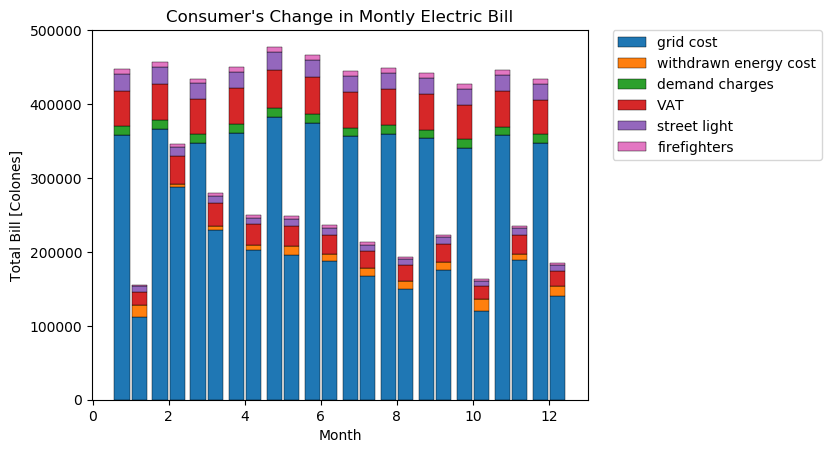

In [33]:
plot_bill(base_bills_commercial, bills_commercial, ["grid_cost", "withdrawn_energy_cost", "demand_charges", "VAT", "street_light", "firefighters"]);

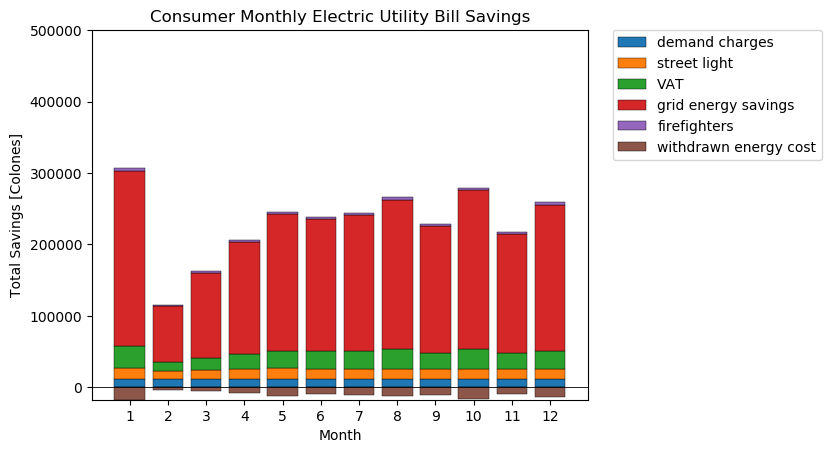

In [34]:
plot_savings(bills_commercial);

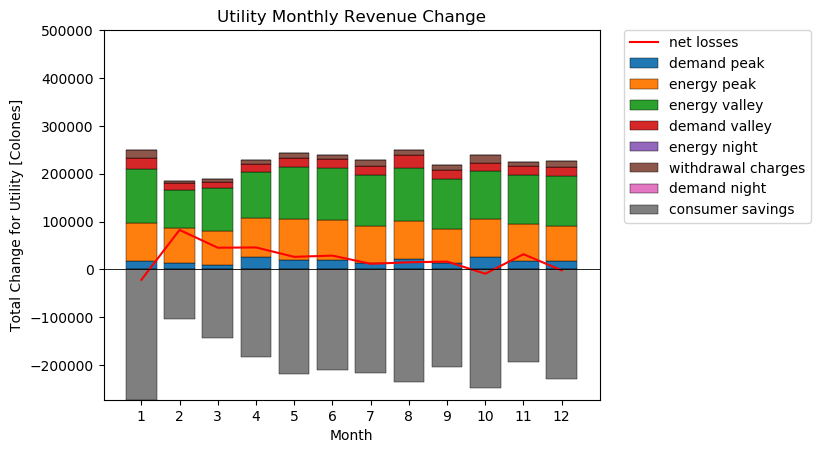

In [35]:
plot_utility_change(bills_commercial);

## Commercial case 3: Large PV system

In [36]:
PVComInd.capacity = 32.0
ts=simulate(ice_commercial, PVComInd, 3);

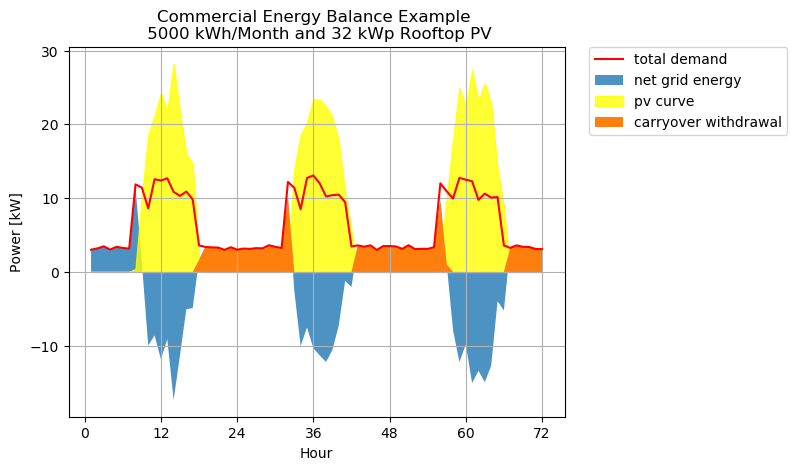

In [37]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "net grid energy", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "pv curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "carryover withdrawal")
plot(hours, ts["demand_curve"], label = "total demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);
title("Commercial Energy Balance Example \n 5000 kWh/Month and 32 kWp Rooftop PV");

In [38]:
ebalance = annual_energy_balance(ice_commercial, PVComInd, print_output=true);

month consumer_energy PV_energy injection_grid grid_energy global_allowance allowance withdrawn_energy utility_supplied_energy carryover peak_power peak_demand
1 4997.21 6096.01 2668.22 1569.42 2987.05 2668.22 1569.42 0.0 1098.8 14.89 6.32
2 5112.41 4460.88 1300.78 1952.31 3603.45 2399.58 1952.31 0.0 447.27 16.84 12.43
3 4858.64 4470.23 1477.19 1865.61 3841.55 1924.46 1865.61 0.0 58.85 14.47 10.87
4 5013.61 5466.3 2150.33 1697.63 4654.43 2209.18 1697.63 0.0 511.55 15.44 7.28
5 5362.79 5384.92 1785.42 1763.3 5595.41 2296.97 1763.3 0.0 533.68 15.97 7.39
6 5184.51 5552.0 2077.46 1709.98 6552.59 2611.13 1709.98 0.0 901.16 15.98 5.86
7 4955.09 5213.8 2088.62 1829.91 7397.38 2989.78 1829.91 0.0 1159.87 14.68 9.93
8 5014.41 5600.07 2399.06 1813.4 8311.5 3558.92 1813.4 0.0 1745.53 14.93 6.07
9 4899.02 5469.24 2255.09 1684.87 9178.03 4000.62 1684.87 0.0 2315.75 14.97 9.89
10 4754.05 5107.07 2097.33 1744.31 9995.62 4413.07 1744.31 0.0 2668.77 14.15 9.63
11 4931.83 5540.41 2289.97 1681.4 10966.12

In [39]:
bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " ", "total_demand_charges", " | ", 
        "counterfactual_energy_cost", " ", "counterfactual_demand_cost", " ", "counterfactual_cost", " ", " | ", "savings")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], ice_commercial, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost total_demand_charges | counterfactual_energy_cost counterfactual_demand_cost counterfactual_cost  | savings
3189.6 33005.0 0.0 44935.65  | 359099.8 11878.17 448184.68  | 403249.03
3189.6 41057.09 0.0 55898.41  | 367377.61 11878.17 458201.84  | 402303.43
3189.6 39233.74 0.0 53415.96  | 349142.03 11878.17 436134.57  | 382718.62
3189.6 35701.21 0.0 48606.48  | 360277.87 11878.17 449610.29  | 401003.8
3189.6 37082.14 0.0 50486.59  | 385370.33 11878.17 479975.22  | 429488.63
3189.6 35960.8 0.0 48959.91  | 372559.21 11878.17 464472.21  | 415512.3
3189.6 38482.96 0.0 52393.77  | 356072.79 11878.17 444521.64  | 392127.86
3189.6 38135.79 0.0 51921.12  | 360335.6 11878.17 449680.15  | 397759.03
3189.6 35432.86 0.0 48241.13  | 352043.34 11878.17 439645.51  | 391404.38
3189.6 36682.77 0.0 49942.86  | 341625.9 11878.17 427039.14  | 377096.28
3189.6 35359.81 0.0 48141.67  | 354401.35 11878.17 442498.99  | 394357.32
3189.6 32598.8 0.0 44382.62  | 3471

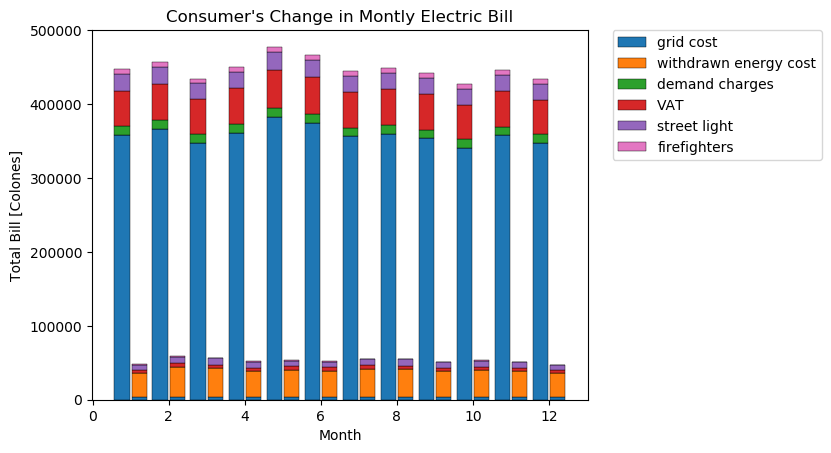

In [64]:
plot_bill(base_bills_commercial, bills_commercial, ["grid_cost", "withdrawn_energy_cost", "demand_charges", "VAT", "street_light", "firefighters"]);

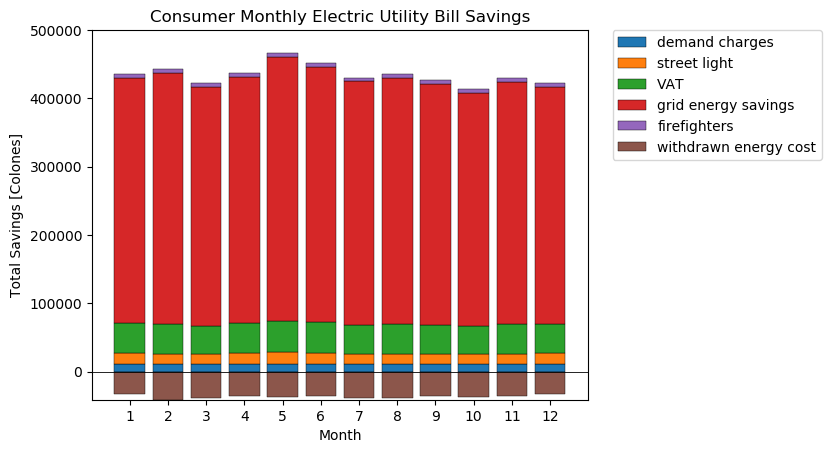

In [65]:
plot_savings(bills_commercial);

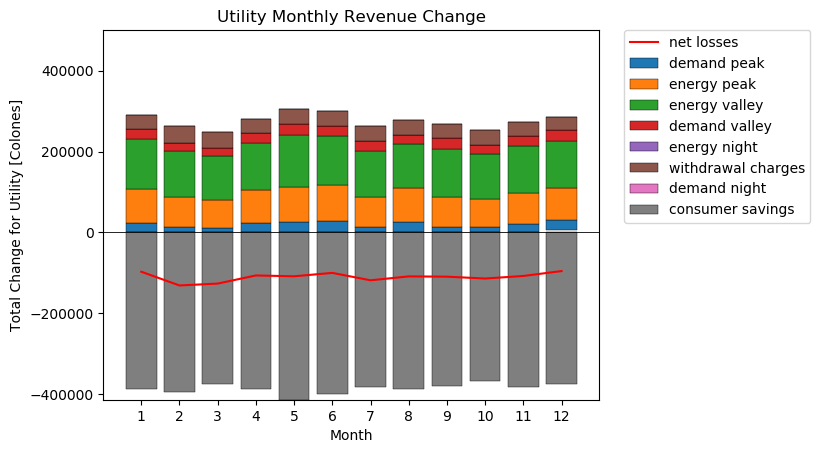

In [42]:
plot_utility_change(bills_commercial);

# Medium Voltage (TMT) cases, users are medium to large industrial consumers.

## TMT case 1: small PV system

In [43]:
PVTMT.capacity = 0.0
base_ebalance = annual_energy_balance(ice_mediumvoltage, PVTMT, print_output=false);
PVTMT.capacity = 30.0
ts=simulate(ice_mediumvoltage, PVTMT, 3);

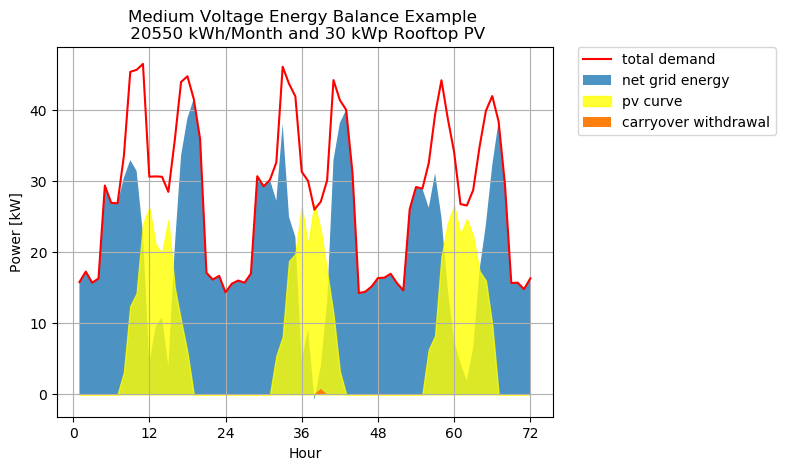

In [44]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "net grid energy", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "pv curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "carryover withdrawal")
plot(hours, ts["demand_curve"], label = "total demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);
title("Medium Voltage Energy Balance Example \n 20550 kWh/Month and 30 kWp Rooftop PV");

In [45]:
ebalance = annual_energy_balance(ice_mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy total_injection global_allowance withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | global_generation global_withdrawal carry_over  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | 
1 | 7597.88 7741.03 5772.91  | 5719.35 0.0 2802.48 0.0  | 5186.83 4432.73 5772.91  | 5719.35 0.0 0.0  | 46.46 46.37 35.79  | 46.41 30.99 35.79 
2 | 6964.57 7061.86 5309.31  | 3808.57 0.0 4668.68 0.0  | 5350.27 4867.58 5309.31  | 9527.92 0.0 0.0  | 47.28 46.19 36.36  | 47.28 32.05 36.36 
3 | 7535.03 7718.27 5779.7  | 4186.85 0.0 6720.24 0.0  | 5504.5 5561.96 5779.7  | 13714.77 0.0 0.0  | 46.62 46.54 35.5  | 46.62 30.85 35.5 
4 | 7865.09 8024.01 5995.74  | 5146.75 0.0 9242.15 0.0  | 5935.16 4807.18 5995.74  | 18861.52 0.0 0.0  | 49.79 49.8 38.17  | 49.79 33.6 38.17 
5 | 7642.54 7678.33 5771.96  | 5136.57 0.0 11759.06 0.0  | 5448.64 473

In [46]:
bills_TMT= Dict(); base_bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",      
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",  
        "counterfactual_demand_cost_peak", " ",
        "counterfactual_demand_cost_valley"," ",
        "counterfactual_demand_cost_night"," ",        
         " | ",
        "total_savings")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], ice_mediumvoltage, print_output=true)
    base_bills_TMT[m] = monthly_bill(base_ebalance[m], ice_mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_demand_cost_peak counterfactual_demand_cost_valley counterfactual_demand_cost_night  | total_savings
357372.51 113477.96 90981.11  | 0.0  | 523494.0 198170.42 90981.11  | 518891.49 241915.47 178969.19  | 519486.42 362024.01 178969.19  | 452053.33 
522712.29 197395.46 90991.73  | 0.0  | 522712.29 197395.46 90991.73  | 520897.99 362000.98 179475.69  | 520897.99 362000.98 179475.69  | 0.0 
368633.76 124610.06 83674.75  | 0.0  | 479858.81 180783.49 83674.75  | 528612.88 250237.27 181841.45  | 528612.88 360592.64 181841.45  | 335861.11 
477825.02 182985.95 83551.94  | 0.0  | 477825.02 182985.95 83551.94  | 529580.72 365947.56 182187.93  | 529580.72 365947.56 182187.93  | 0.0 
379260.24 142386.07 91088.0  | 0.0

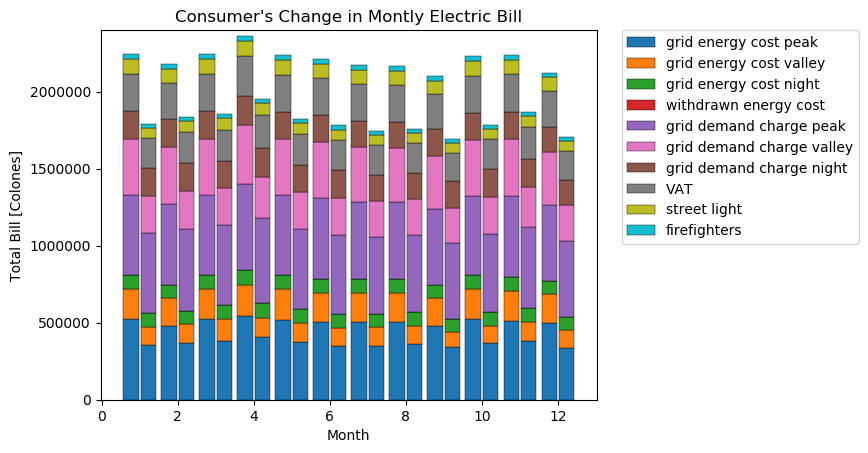

In [47]:
fields = ["grid_energy_cost_peak", 
        "grid_energy_cost_valley",
        "grid_energy_cost_night", 
        "withdrawn_energy_cost",      
        "grid_demand_charge_peak",    
        "grid_demand_charge_valley", 
        "grid_demand_charge_night",
        "VAT", "street_light", "firefighters"]
plot_bill(base_bills_TMT, bills_TMT, fields, 2);

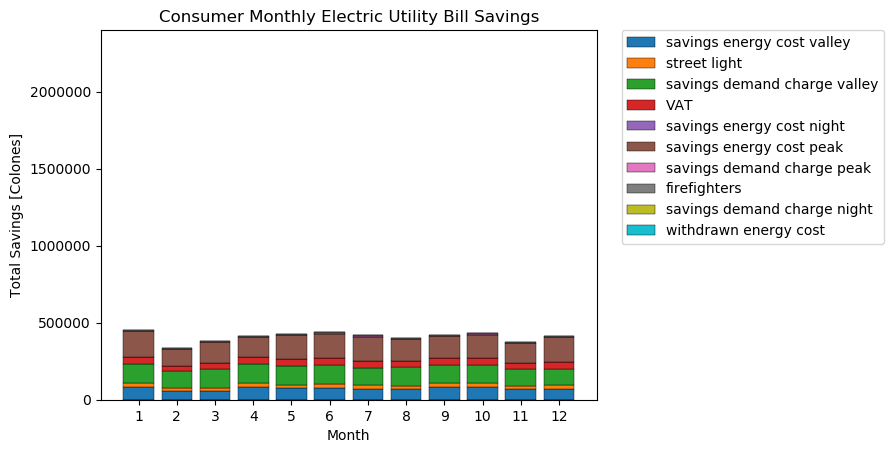

In [48]:
plot_savings(bills_TMT, 2);

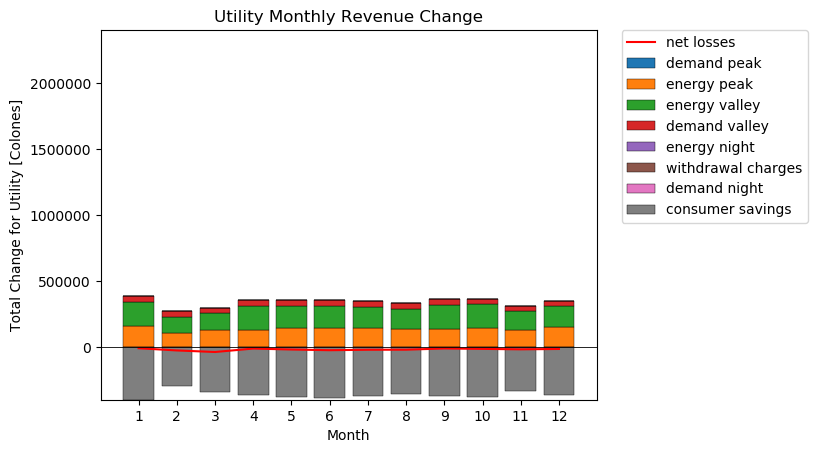

In [49]:
plot_utility_change(bills_TMT,2);

## TMT Case2: Medium PV System

In [50]:
PVTMT.capacity = 75
ts=simulate(ice_mediumvoltage, PVTMT, 3);

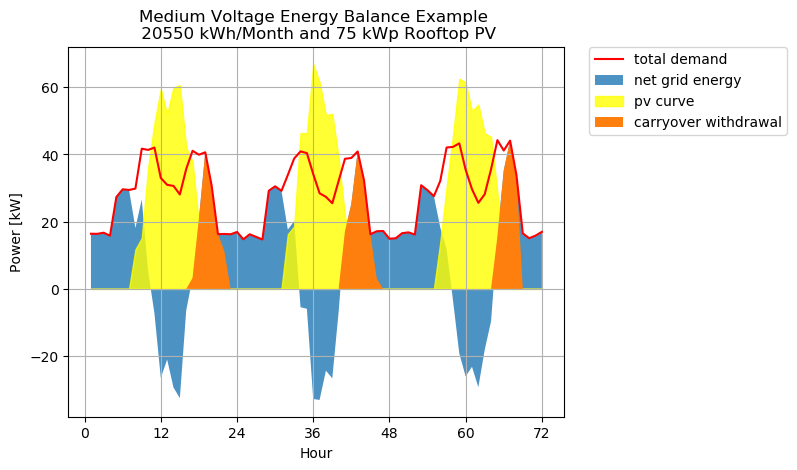

In [51]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "net grid energy", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "pv curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "carryover withdrawal")
plot(hours, ts["demand_curve"], label = "total demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);
title("Medium Voltage Energy Balance Example \n 20550 kWh/Month and 75 kWp Rooftop PV");

In [52]:
ebalance = annual_energy_balance(ice_mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy total_injection global_allowance withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | global_generation global_withdrawal carry_over  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | 
1 | 7590.53 7738.73 5760.02  | 14784.08 4323.4 7244.2 4323.4  | 3391.26 1477.32 5760.02  | 14784.08 4323.4 0.0  | 46.49 46.47 35.53  | 46.28 30.94 35.53 
2 | 6974.17 7046.43 5297.06  | 10257.83 2246.79 7947.14 2246.79  | 3707.96 2301.6 5297.06  | 25041.92 6570.19 0.0  | 47.23 47.38 36.06  | 47.07 31.46 36.06 
3 | 7575.43 7777.99 5787.96  | 11954.69 2977.95 11558.15 2977.95  | 3937.7 2438.98 5787.96  | 36996.61 9548.14 0.0  | 46.55 46.13 35.87  | 46.35 31.02 35.87 
4 | 7827.16 8004.37 5970.48  | 12249.62 2243.3 14582.52 2243.3  | 3936.63 1888.59 5970.48  | 49246.23 11791.44 0.0  | 49.86 49.87 38.39  | 49.78 33.01 38.39 
5 | 7552.41 77

In [53]:
bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",      
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",  
        "counterfactual_demand_cost_peak", " ",
        "counterfactual_demand_cost_valley"," ",
        "counterfactual_demand_cost_night"," ",        
         " | ",
        "total_savings")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], ice_mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_demand_cost_peak counterfactual_demand_cost_valley counterfactual_demand_cost_night  | total_savings
104973.42 0.0 90777.86  | 90921.03  | 522987.39 198111.6 90777.86  | 517449.37 241574.61 177692.59  | 519766.25 362801.16 177692.59  | 791511.37 
192067.49 24963.51 83481.63  | 47250.06  | 480520.39 180388.55 83481.63  | 526308.92 245584.84 180293.14  | 528068.48 369862.45 180293.14  | 635807.83 
158148.25 28247.09 91218.25  | 62626.25  | 521947.46 199116.57 91218.25  | 518217.7 242159.09 179375.29  | 520453.06 360108.15 179375.29  | 719975.69 
196681.27 18619.44 94094.81  | 47176.7  | 539291.27 204911.98 94094.81  | 556552.38 257739.36 191951.52  | 557513.7 389310.4 191951.52  | 749889.71 
122708.32 17591

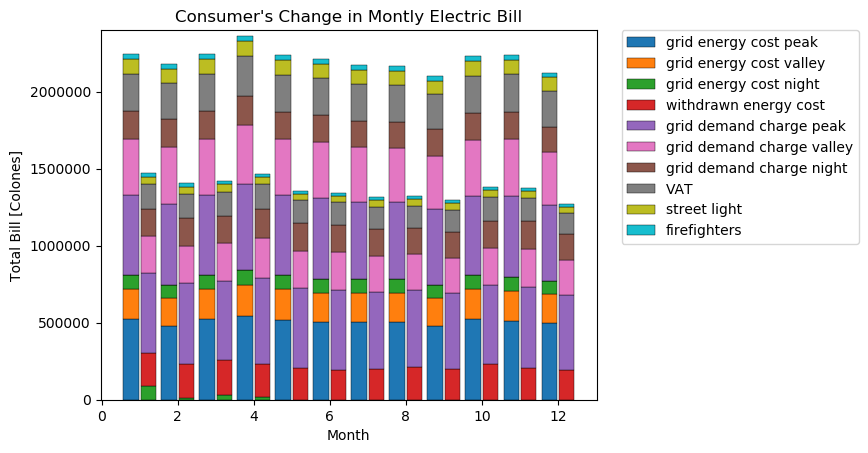

In [66]:
fields = ["grid_energy_cost_peak", 
        "grid_energy_cost_valley",
        "grid_energy_cost_night", 
        "withdrawn_energy_cost",      
        "grid_demand_charge_peak",    
        "grid_demand_charge_valley", 
        "grid_demand_charge_night",
        "VAT", "street_light", "firefighters"]
plot_bill(base_bills_TMT, bills_TMT, fields,2);

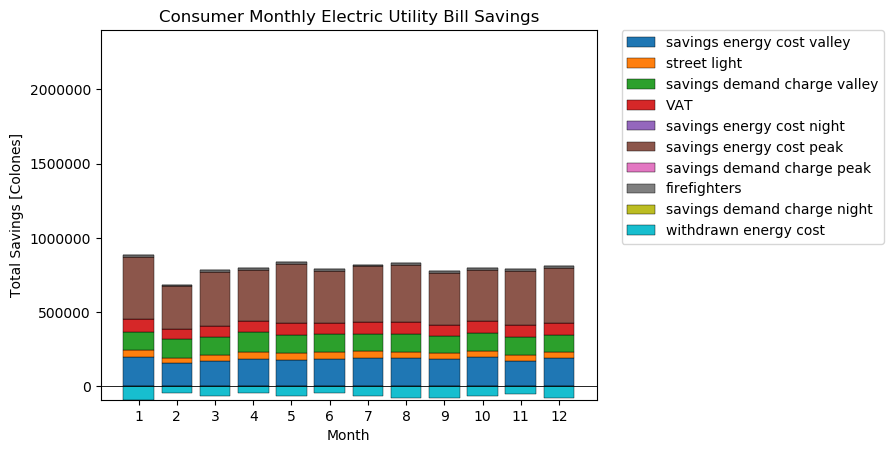

In [55]:
plot_savings(bills_TMT,2);

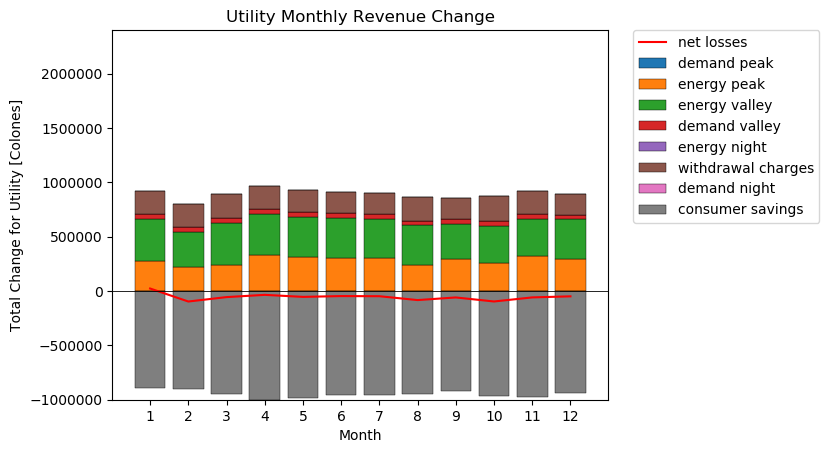

In [67]:
plot_utility_change(bills_TMT,2);

## TMT Case 3: Large PV System

In [57]:
PVTMT.capacity = 150
ts=simulate(ice_mediumvoltage, PVTMT, 3);

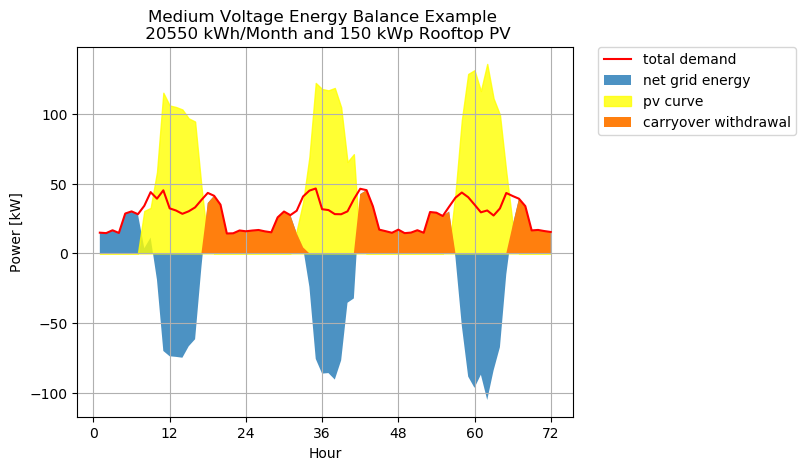

PyObject Text(0.5, 1.0, 'Medium Voltage Energy Balance Example \n 20550 kWh/Month and 150 kWp Rooftop PV')

In [58]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "net grid energy", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "pv curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "carryover withdrawal")
plot(hours, ts["demand_curve"], label = "total demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);
title("Medium Voltage Energy Balance Example \n 20550 kWh/Month and 150 kWp Rooftop PV")

In [59]:
ebalance = annual_energy_balance(ice_mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy total_injection global_allowance withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | global_generation global_withdrawal carry_over  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | 
1 | 7597.98 7684.18 5787.99  | 29547.62 18562.2 14478.34 10084.71  | 3420.1 876.63 5787.99  | 29547.62 10084.71 4393.62  | 46.58 46.51 35.39  | 46.53 30.79 35.39 
2 | 6969.61 7077.97 5274.38  | 19731.53 10717.32 14062.07 10307.74  | 3620.9 1412.46 5274.38  | 49279.15 20392.46 3754.33  | 47.38 47.31 36.4  | 46.98 31.42 36.4 
3 | 7574.08 7703.2 5779.08  | 23604.25 13149.49 15320.41 10601.61  | 3941.28 881.24 5779.08  | 72883.4 30994.06 4718.8  | 46.41 46.6 35.91  | 46.41 30.95 35.91 
4 | 7869.77 7933.87 5985.88  | 26959.96 15303.17 17929.18 10132.73  | 2881.06 1265.8 5985.88  | 99843.36 41126.8 7796.45  | 49.85 49.32 38.31  | 49.77 33.

In [60]:
bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",      
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",  
        "counterfactual_demand_cost_peak", " ",
        "counterfactual_demand_cost_valley"," ",
        "counterfactual_demand_cost_night"," ",        
         " | ",
        "savings")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], ice_mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_demand_cost_peak counterfactual_demand_cost_valley counterfactual_demand_cost_night  | savings
0.0 0.0 91218.68  | 212081.5  | 523500.51 196714.93 91218.68  | 520228.05 240357.81 176991.81  | 520824.04 363084.53 176991.81  | 774030.93 
0.0 0.0 13880.68  | 216771.88  | 480206.36 181195.95 83124.17  | 525266.31 245273.92 182029.65  | 529757.12 369377.22 182029.65  | 777796.02 
0.0 0.0 31910.14  | 222951.76  | 521854.3 197201.85 91078.35  | 518965.26 241654.71 179556.48  | 518965.26 363812.76 179556.48  | 824398.08 
0.0 0.0 19969.08  | 213091.37  | 542227.48 203107.05 94337.43  | 556474.77 258488.29 191589.89  | 557373.61 385014.96 191589.89  | 894763.02 
0.0 0.0 0.0  | 206359.84  | 522932.45 197010.16 90564

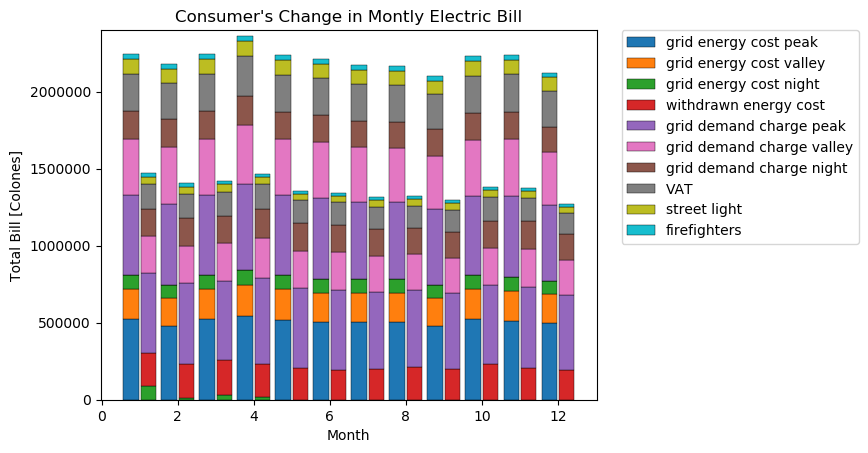

In [61]:
fields = ["grid_energy_cost_peak", 
        "grid_energy_cost_valley",
        "grid_energy_cost_night", 
        "withdrawn_energy_cost",      
        "grid_demand_charge_peak",    
        "grid_demand_charge_valley", 
        "grid_demand_charge_night",
        "VAT", "street_light", "firefighters"]
plot_bill(base_bills_TMT, bills_TMT, fields,2);

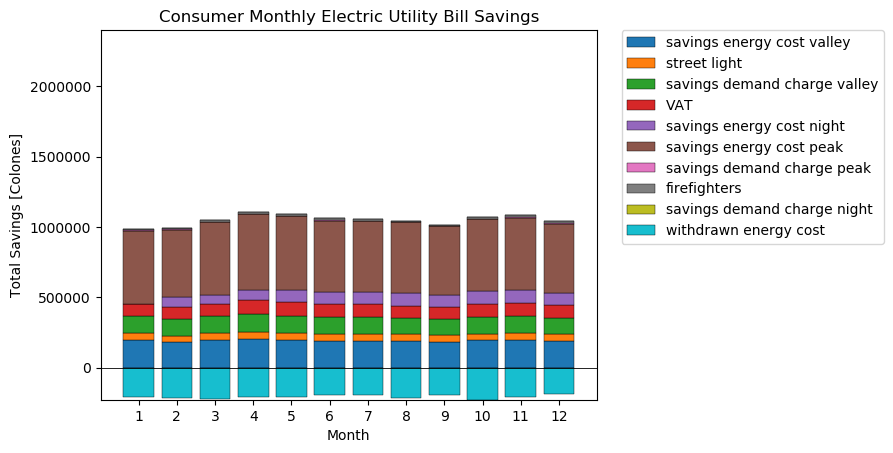

In [62]:
plot_savings(bills_TMT,2);

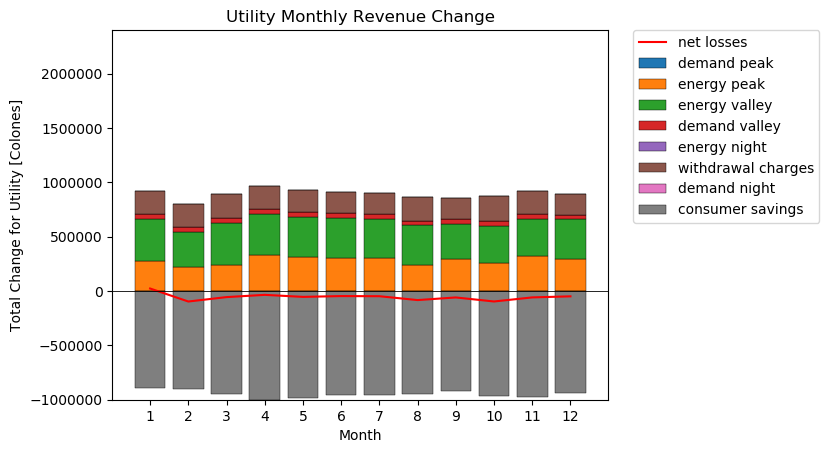

In [68]:
plot_utility_change(bills_TMT,2);